# Kernel SVM

## Importing the libraries

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [4]:
print(X_train)

[[  52    4]
 [  44 1071]
 [  55 4103]
 ...
 [  53  306]
 [  32  642]
 [  45 -322]]


In [5]:
print(y_train)

[1 0 0 ... 0 1 0]


In [6]:
print(X_test)

[[  35  378]
 [  31 6248]
 [  30    0]
 ...
 [  44 3762]
 [  41   39]
 [  41 4684]]


In [7]:
print(y_test)

[0 0 0 ... 0 0 0]


## Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# Применяем стандартизацию к обучающей выборке X_train
# fit_transform() вычисляет среднее и стандартное отклонение для каждой особенности,
# а затем применяет преобразование, чтобы отмасштабировать данные (т.е. сделать их с нулевым средним и единичной дисперсией)
X_train = sc.fit_transform(X_train)

# Применяем стандартизацию к тестовой выборке X_test
# transform() использует те же параметры, вычисленные на обучающей выборке (среднее и стандартное отклонение),
# чтобы масштабировать тестовые данные, что обеспечивает согласованность
X_test = sc.transform(X_test)

In [9]:
print(X_train)

[[ 1.0182452  -0.46513013]
 [ 0.26749595 -0.11761743]
 [ 1.29977617  0.86987881]
 ...
 [ 1.11208886 -0.36677133]
 [-0.85862794 -0.25733903]
 [ 0.3613396  -0.57130552]]


In [10]:
print(X_test)

[[-0.57709696 -0.34332156]
 [-0.95247159  1.5684868 ]
 [-1.04631525 -0.46643289]
 ...
 [ 0.26749595  0.75881805]
 [-0.01403502 -0.45373093]
 [-0.01403502  1.05910549]]


## Training the Kernel SVM model on the Training set

In [11]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB  # Импортируем наивный байесовский классификатор
from sklearn.tree import DecisionTreeClassifier  # Импортируем классификатор на основе дерева решений
from sklearn.ensemble import RandomForestClassifier  # Импортируем классификатор на основе случайного леса

# Создаем экземпляр классификатора SVM с использованием радиальной базисной функции (RBF) в качестве ядра
# Параметр random_state устанавливает начальное состояние генератора случайных чисел для воспроизводимости
classifier = SVC(kernel = 'rbf', random_state = 0)
# Создаем экземпляр наивного байесовского классификатора
classifier2 = GaussianNB()  # GaussianNB используется для данных, которые предполагают нормальное распределение

# Создаем экземпляр классификатора на основе дерева решений
classifier3 = DecisionTreeClassifier(random_state=0)

# Создаем экземпляр классификатора на основе случайного леса
classifier4 = RandomForestClassifier(random_state=0)

# Обучаем классификаторы на обучающей выборке (X_train) и соответствующих метках (y_train)
classifier.fit(X_train, y_train)
classifier2.fit(X_train, y_train)
classifier3.fit(X_train, y_train)
classifier4.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

## Predicting a new result

In [12]:
print(classifier.predict(sc.transform([[30,87000]])))
print(classifier2.predict(sc.transform([[30,87000]])))


[0]
[0]


## Predicting the Test set results

In [13]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

y_pred2 = classifier2.predict(X_test)
print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y_test.reshape(len(y_test),1)),1))

y_pred3 = classifier3.predict(X_test)
print(np.concatenate((y_pred3.reshape(len(y_pred3),1), y_test.reshape(len(y_test),1)),1))
y_pred4 = classifier4.predict(X_test)
print(np.concatenate((y_pred4.reshape(len(y_pred4),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 0]]
[[1 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 0]]


## Making the Confusion Matrix

In [14]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score

# Создаем матрицы путаницы
cm = confusion_matrix(y_test, y_pred)
cm2 = confusion_matrix(y_test, y_pred2)
cm3 = confusion_matrix(y_test, y_pred3)
cm4 = confusion_matrix(y_test, y_pred4)

# Вычисляем точность моделей
accuracy1 = accuracy_score(y_test, y_pred)
accuracy2 = accuracy_score(y_test, y_pred2)
accuracy3 = accuracy_score(y_test, y_pred3)
accuracy4 = accuracy_score(y_test, y_pred4)

# Создаем DataFrame для более понятного отображения
results = pd.DataFrame({
    'Classifier': ['SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy1, accuracy2, accuracy3, accuracy4],
    'True Positives': [cm[1, 1], cm2[1, 1], cm3[1, 1], cm4[1, 1]],
    'True Negatives': [cm[0, 0], cm2[0, 0], cm3[0, 0], cm4[0, 0]],
    'False Positives': [cm[0, 1], cm2[0, 1], cm3[0, 1], cm4[0, 1]],
    'False Negatives': [cm[1, 0], cm2[1, 0], cm3[1, 0], cm4[1, 0]],
})

# Отображаем таблицу
print(results)


      Classifier  Accuracy  True Positives  True Negatives  False Positives  \
0            SVM  0.855880               0             968                0   
1    Naive Bayes  0.855880               0             968                0   
2  Decision Tree  0.750663              26             823              145   
3  Random Forest  0.776304              18             860              108   

   False Negatives  
0              163  
1              163  
2              137  
3              145  


## Visualising the Training set results

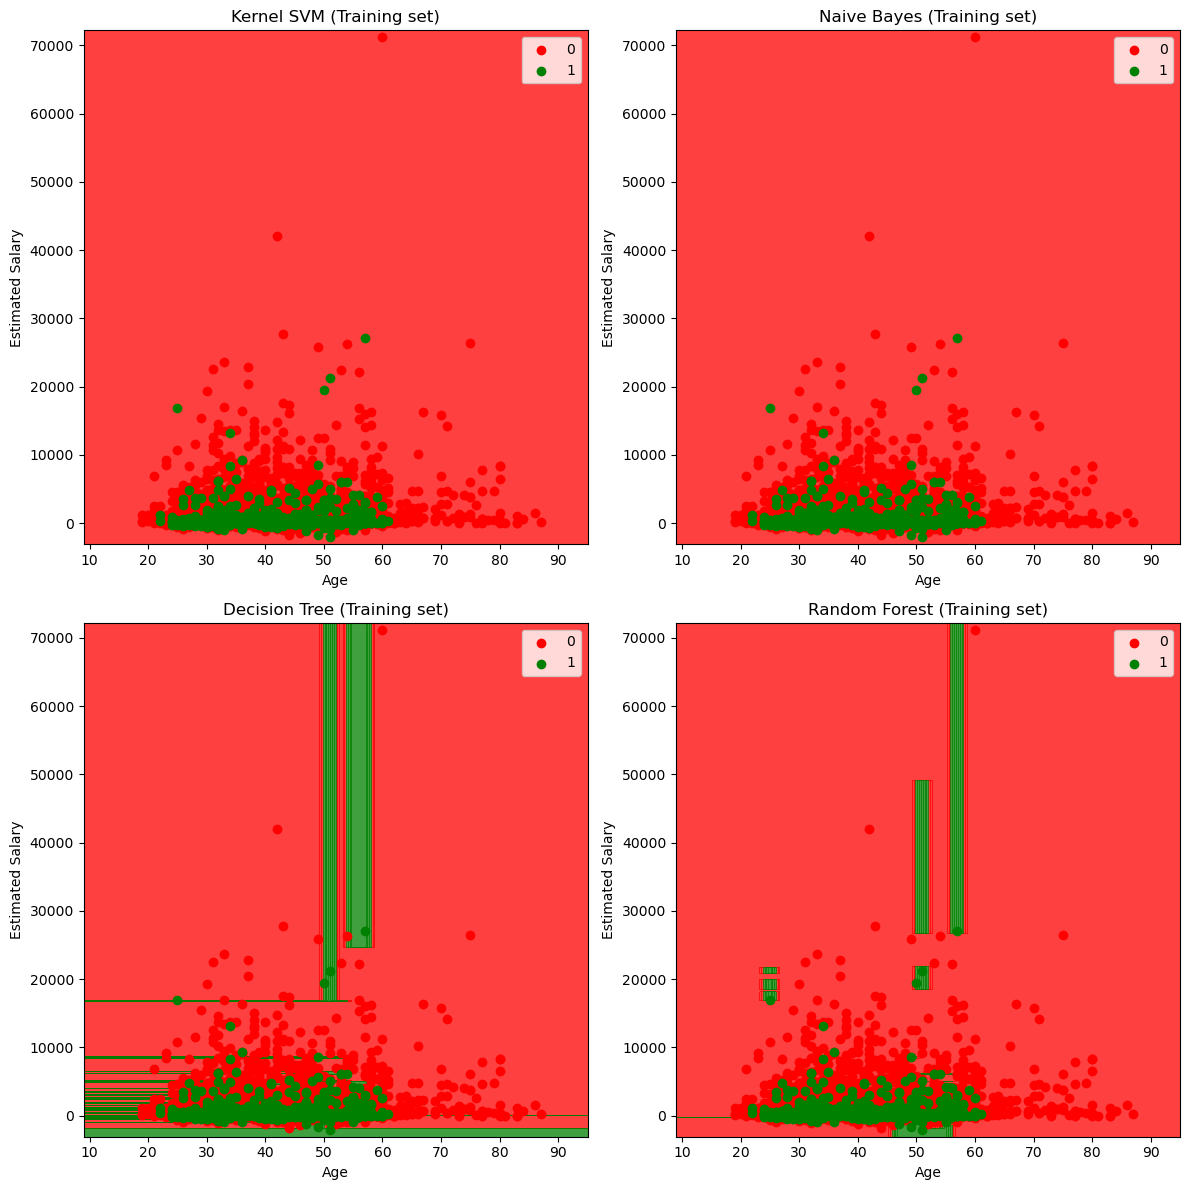

In [15]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

# Предполагаем, что X_train, y_train и sc определены ранее в вашем код
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=2),
                     np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=2))

# Создаем фигуру с четырьмя подграфиками
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# График для SVM
axes[0, 0].contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
                    alpha=0.75, cmap=ListedColormap(('red', 'green')))
axes[0, 0].set_xlim(X1.min(), X1.max())
axes[0, 0].set_ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    axes[0, 0].scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color=ListedColormap(('red', 'green'))(i), label=j)

axes[0, 0].set_title('Kernel SVM (Training set)')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Estimated Salary')
axes[0, 0].legend()

# График для наивного байесовского классификатора
axes[0, 1].contourf(X1, X2, classifier2.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
                    alpha=0.75, cmap=ListedColormap(('red', 'green')))
axes[0, 1].set_xlim(X1.min(), X1.max())
axes[0, 1].set_ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    axes[0, 1].scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color=ListedColormap(('red', 'green'))(i), label=j)

axes[0, 1].set_title('Naive Bayes (Training set)')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Estimated Salary')
axes[0, 1].legend()

# График для дерева решений
axes[1, 0].contourf(X1, X2, classifier3.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
                    alpha=0.75, cmap=ListedColormap(('red', 'green')))
axes[1, 0].set_xlim(X1.min(), X1.max())
axes[1, 0].set_ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    axes[1, 0].scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color=ListedColormap(('red', 'green'))(i), label=j)

axes[1, 0].set_title('Decision Tree (Training set)')
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Estimated Salary')
axes[1, 0].legend()

# График для случайного леса
axes[1, 1].contourf(X1, X2, classifier4.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
                    alpha=0.75, cmap=ListedColormap(('red', 'green')))
axes[1, 1].set_xlim(X1.min(), X1.max())
axes[1, 1].set_ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    axes[1, 1].scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color=ListedColormap(('red', 'green'))(i), label=j)

axes[1, 1].set_title('Random Forest (Training set)')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Estimated Salary')
axes[1, 1].legend()

# Отображаем графики
plt.tight_layout()  # Подгоняем подграфики
plt.show()


## Visualising the Test set results

KeyboardInterrupt: 

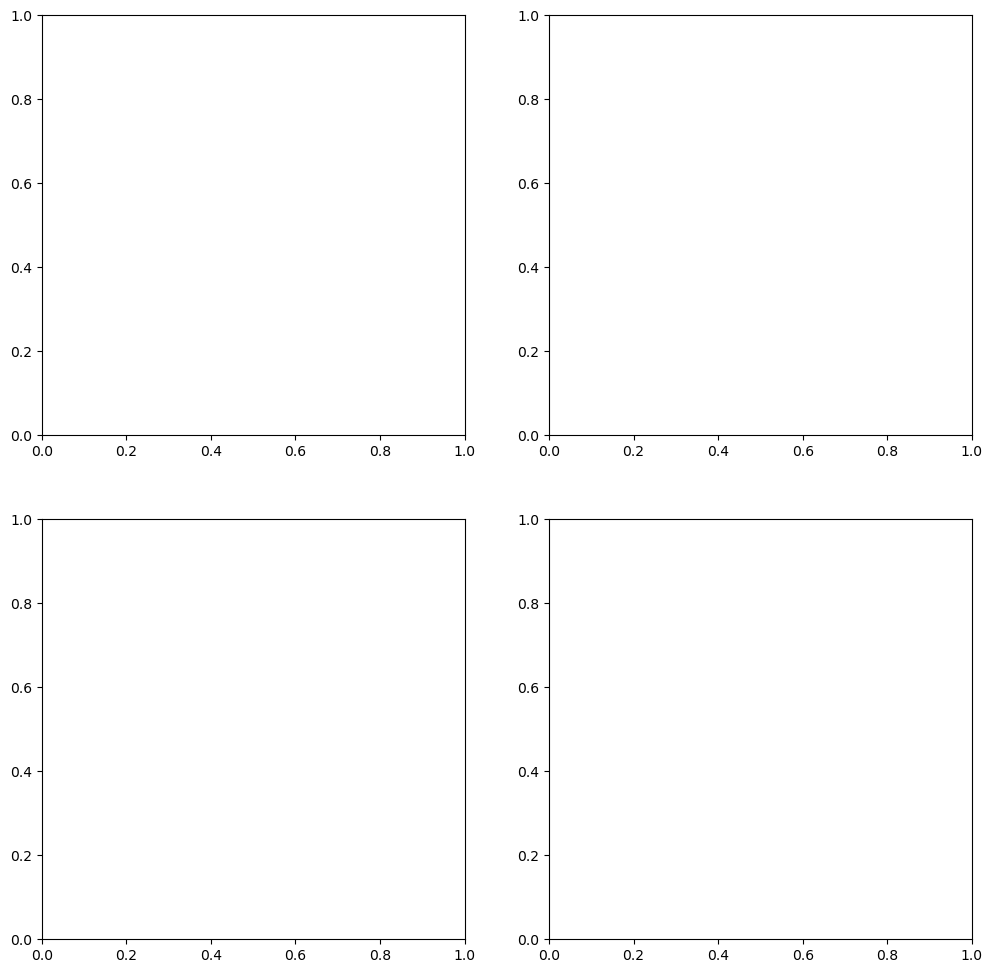

In [16]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

# Предполагаем, что X_test, y_test и sc определены ранее в вашем код
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=2),
                     np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=2))

# Создаем фигуру с четырьмя подграфиками
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# График для SVM
axes[0, 0].contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
                    alpha=0.75, cmap=ListedColormap(('red', 'green')))
axes[0, 0].set_xlim(X1.min(), X1.max())
axes[0, 0].set_ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    axes[0, 0].scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color=ListedColormap(('red', 'green'))(i), label=j)

axes[0, 0].set_title('Kernel SVM (Test set)')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Estimated Salary')
axes[0, 0].legend()

# График для наивного байесовского классификатора
axes[0, 1].contourf(X1, X2, classifier2.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
                    alpha=0.75, cmap=ListedColormap(('red', 'green')))
axes[0, 1].set_xlim(X1.min(), X1.max())
axes[0, 1].set_ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    axes[0, 1].scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color=ListedColormap(('red', 'green'))(i), label=j)

axes[0, 1].set_title('Naive Bayes (Test set)')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Estimated Salary')
axes[0, 1].legend()

# График для дерева решений
axes[1, 0].contourf(X1, X2, classifier3.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
                    alpha=0.75, cmap=ListedColormap(('red', 'green')))
axes[1, 0].set_xlim(X1.min(), X1.max())
axes[1, 0].set_ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    axes[1, 0].scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color=ListedColormap(('red', 'green'))(i), label=j)

axes[1, 0].set_title('Decision Tree (Test set)')
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Estimated Salary')
axes[1, 0].legend()

# График для случайного леса
axes[1, 1].contourf(X1, X2, classifier4.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
                    alpha=0.75, cmap=ListedColormap(('red', 'green')))
axes[1, 1].set_xlim(X1.min(), X1.max())
axes[1, 1].set_ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    axes[1, 1].scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color=ListedColormap(('red', 'green'))(i), label=j)

axes[1, 1].set_title('Random Forest (Test set)')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Estimated Salary')
axes[1, 1].legend()

# Отображаем графики
plt.tight_layout()  # Подгоняем подграфики
plt.show()
